In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import shutil
from collections import Counter
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-image-classification/submit.csv
/kaggle/input/sign-language-image-classification/train.csv
/kaggle/input/sign-language-image-classification/test.csv
/kaggle/input/sign-language-image-classification/images/images/test/91ad97d64ba1a9e4d77f960bdae6efd3.jpg
/kaggle/input/sign-language-image-classification/images/images/test/81cf1d5b3af487cc91cb7facfdea24db.jpg
/kaggle/input/sign-language-image-classification/images/images/test/ffa44bfbce1fdecd9302524a6cd9bb37.jpg
/kaggle/input/sign-language-image-classification/images/images/test/9188ea7efca3896bae639805dc636d03.jpg
/kaggle/input/sign-language-image-classification/images/images/test/ceaa79ac54b72590b41a0105176c455c.jpg
/kaggle/input/sign-language-image-classification/images/images/test/51e9c7f5620ed968f9c74b102fe435c1.jpg
/kaggle/input/sign-language-image-classification/images/images/test/2493551f1dfb19a3a71104c89546d0f2.jpg
/kaggle/input/sign-language-image-classification/images/images/test/3c07e8a3939412b5f93c

In [2]:
working_dir=os.getcwd()
print(working_dir)

/kaggle/working


In [3]:
base_dir='/kaggle/input/sign-language-image-classification'
print(os.path.isdir(base_dir))

True


In [4]:
my_trainpath='/kaggle/working/my_train'
my_testpath='/kaggle/working/my_test'

In [5]:
for i in range(20):
    os.makedirs(os.path.join(working_dir,f'my_test/{i}'),exist_ok=True)
for i in range(20):
    os.makedirs(os.path.join(working_dir,f'my_train/{i}'),exist_ok=True)

In [6]:
train_csv_path=os.path.join(base_dir,'train.csv')
test_csv_path=os.path.join(base_dir,'test.csv')

train_csv=pd.read_csv(train_csv_path)
test_csv=pd.read_csv(test_csv_path)
train_csv.head(10)

,id,label
0,b1627fb5d6af156b41c46704bc041416.jpg,8
1,bf61d61ec5f282372b76311e2594b94f.jpg,13
2,1e963951fb29f4f37d9a153e14533d80.jpg,17
3,4aec4a36181bd02af6040e3b4eef8378.jpg,14
4,78740bc6ad7b6ca6fe572a580ffa65e0.jpg,16
5,4caeafa514ae949eeeea54a71efd89c0.jpg,9
6,c2063e258414f2f5ec511fda06288621.jpg,3
7,cc34f29df0da071c3a8523b8d9478cbb.jpg,4
8,c620c2b977426bb6122dd834846aebd6.jpg,19
9,98f72a118aa838cd356d43d9546fcd39.jpg,18


In [7]:
test_csv.head(10)

,id
0,5f3540c43f86dab2c9a7c87834311ee3.jpg
1,7f14db51f1994bce42972c7fe111f5cd.jpg
2,092908960a3d4dccbe06a60b71dcdd98.jpg
3,542ed4f107f9472457b47a436ec55e60.jpg
4,c125af0d467cffe584728aad4b426d53.jpg
5,dac637220376b2f834447c515148e301.jpg
6,c94daf6d789e53fd933cb26cedf00678.jpg
7,559cbbb343a27ec2839477c53b0ba65b.jpg
8,4a6bd7247218fe3cd2001a634b1fd6df.jpg
9,0598c5bd6d54bb7d9e3b7ece979a118c.jpg


In [8]:
train_csv.shape

(2000, 2)

In [9]:
train_csv.describe()

,label
count,2000.000000
mean,9.500000
std,5.767723
min,0.000000
25%,4.750000
50%,9.500000
75%,14.250000
max,19.000000


In [10]:
dict_data=train_csv.to_dict(orient='list')
label=dict_data['label']
id_data=dict_data['id']

In [11]:
dict_test_data=test_csv.to_dict(orient='list')
id_data_test=dict_test_data['id']

In [12]:
train_path='/kaggle/input/sign-language-image-classification/images/images/train'
test_path='/kaggle/input/sign-language-image-classification/images/images/test'
print(len(os.listdir(test_path)))

1504


In [13]:
for i in range(2000):
    if i<=int(2000*0.4):
        shutil.copy(os.path.join(train_path,id_data[i]),os.path.join(my_testpath,str(label[i])))
    else:    
        shutil.copy(os.path.join(train_path,id_data[i]),os.path.join(my_trainpath,str(label[i])))

In [14]:
print(len(os.listdir('/kaggle/working/my_test/12')))

38


***Preprocessing Images***

Checking Imbalance Dataset

In [15]:
test_count={}
train_count={}
li_train=os.listdir(my_trainpath)
li_test=os.listdir(my_testpath)
for i in li_train:
    train_count[i]=len(os.listdir(os.path.join(my_trainpath,str(i))))
for j in li_test:
    test_count[j]=len(os.listdir(os.path.join(my_testpath,str(j))))

    

In [16]:
print(train_count)

{'12': 62, '0': 59, '5': 51, '13': 65, '2': 61, '15': 65, '3': 65, '19': 58, '14': 54, '9': 63, '7': 61, '17': 62, '18': 59, '10': 53, '16': 56, '8': 65, '4': 62, '11': 59, '1': 56, '6': 63}


In [17]:
print(dict(sorted(train_count.items(),key=lambda x:x[1])))
print(dict(sorted(test_count.items(),key=lambda x:x[1])))

{'5': 51, '10': 53, '14': 54, '16': 56, '1': 56, '19': 58, '0': 59, '18': 59, '11': 59, '2': 61, '7': 61, '12': 62, '17': 62, '4': 62, '9': 63, '6': 63, '13': 65, '15': 65, '3': 65, '8': 65}
{'13': 35, '15': 35, '3': 35, '8': 35, '9': 37, '6': 37, '12': 38, '17': 38, '4': 38, '2': 39, '7': 39, '0': 41, '18': 41, '11': 41, '19': 42, '16': 44, '1': 44, '14': 46, '10': 47, '5': 49}


***Augmentation Function***

In [18]:
import cv2 as cv

In [19]:
def Noise(image):
    guassian_noise=np.random.normal(0,1,(image.shape)).astype('uint8')
    
    image=cv.add(image,guassian_noise)
    
    return image
def cutout(image):
    height,width,_=image.shape
    x=np.random.randint(0,width-11)
    y=np.random.randint(0,height-11)
    
    image[y:y+10,x:x+10]=0
    
    return image
def Brightness(img):
     value=np.random.randint(40,51)
     return cv.convertScaleAbs(img,alpha=1,beta=value)
func_list=[Brightness,cutout,Noise]

In [20]:
def augment(base,files,times):
    src=os.path.join(base,files)
    folder_list=os.listdir(src)
    for i in range(times):
        value=np.random.randint(0,len(folder_list))
        value2=np.random.randint(0,3)
        pic=os.path.join(src,folder_list[value])
        img=cv.imread(pic)
        img=cv.resize(img,(224,224),cv.INTER_CUBIC)
        augmented_img=func_list[value2](img)

        new_img_name = f'augmented_{i}.jpg'
        cv.imwrite(os.path.join(src, new_img_name), augmented_img)
    return 1

In [21]:
augmented=list(dict(sorted(train_count.items(),key=lambda x:x[1])).items())[:9]

In [22]:
augmented

[('5', 51),
 ('10', 53),
 ('14', 54),
 ('16', 56),
 ('1', 56),
 ('19', 58),
 ('0', 59),
 ('18', 59),
 ('11', 59)]

In [23]:
augment(my_trainpath,'5',10)
augment(my_trainpath,'10',10)
augment(my_trainpath,'14',10)
augment(my_trainpath,'1',10)
augment(my_trainpath,'16',10)
augment(my_trainpath,'19',5)
augment(my_trainpath,'11',5)
augment(my_trainpath,'0',5)
augment(my_trainpath,'18',5)

1

In [24]:
train_count={}
test_count={}
for i in li_train:
    train_count[i]=len(os.listdir(os.path.join(my_trainpath,i)))
for i in li_test:
    test_count[i]=len(os.listdir(os.path.join(my_testpath,i)))

In [25]:
print(dict(sorted(test_count.items(),key=lambda x:x[1])))
print(dict(sorted(train_count.items(),key=lambda x:x[1])))

{'13': 35, '15': 35, '3': 35, '8': 35, '9': 37, '6': 37, '12': 38, '17': 38, '4': 38, '2': 39, '7': 39, '0': 41, '18': 41, '11': 41, '19': 42, '16': 44, '1': 44, '14': 46, '10': 47, '5': 49}
{'5': 61, '2': 61, '7': 61, '12': 62, '17': 62, '4': 62, '19': 63, '9': 63, '10': 63, '6': 63, '0': 64, '14': 64, '18': 64, '11': 64, '13': 65, '15': 65, '3': 65, '8': 65, '16': 66, '1': 66}


In [29]:
def process_Image(img1):
    img1=cv.resize(img1,(224,224),interpolation=cv.INTER_CUBIC)
    if np.max(img1)<=1:
        img1 = (img1 * 255).astype('uint8')
    if len(img1.shape) == 3 and img1.shape[-1] == 3:
        img1 = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
    img1=img1.astype('uint8')   
    img1=cv.bilateralFilter(img1,5,7,10)
    img1 = img1.astype('float32') / 255.0
    img1=np.expand_dims(img1,axis=-1)   
    return img1

In [30]:
train_generator=ImageDataGenerator(
    preprocessing_function=process_Image,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect',
)

In [31]:
validate_generator=ImageDataGenerator(
    preprocessing_function=process_Image,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect',
)

In [32]:
train_generator=train_generator.flow_from_directory(
    my_trainpath,
    color_mode='grayscale',  
    target_size=(224,224),
    class_mode='categorical',
    batch_size=25
)

Found 1269 images belonging to 20 classes.


In [33]:
valid_generator=validate_generator.flow_from_directory(
    my_testpath,
    color_mode='grayscale',  
    target_size=(224,224),
    class_mode='categorical',
    batch_size=25
)

Found 801 images belonging to 20 classes.


In [34]:
img,labels=next(train_generator)
import matplotlib.pyplot as plt

In [35]:
def plotImage(imagearr):
  fig,axes=plt.subplots(1,10,figsize=(20,19))
  axes=axes.flatten()
  for img,ax in zip(imagearr,axes):
    ax.imshow(img,cmap='gray')
    ax.axis('off')
  plt.tight_layout()
  plt.show()


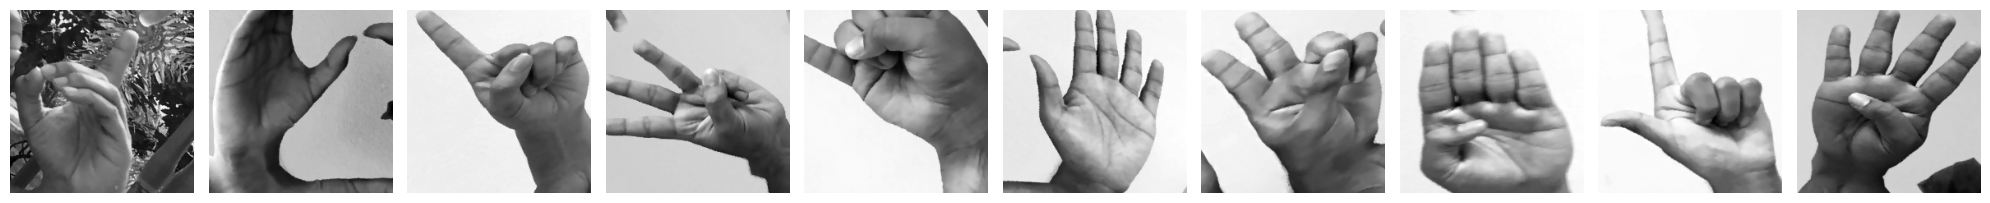

In [36]:
plotImage(img)

****Training The Network****

In [37]:
network=Sequential()
network.add(layers.Conv2D(32,(5,5),activation='relu',padding='same',input_shape=(224,224,1)))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(300,(3,3),padding='same',activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(610,activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(521,activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Dense(300,activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Dense(256,activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Dense(128,activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Dense(64,activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Dense(20,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
network.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['acc']
)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc',  
                               patience=5,          
                               restore_best_weights=True)

In [42]:
network.fit(
    train_generator,
    validation_data=valid_generator,
    validation_steps=12,
    epochs=50,
    verbose=2 
)

Epoch 1/50
51/51 - 13s - 259ms/step - acc: 0.8928 - loss: 0.3353 - val_acc: 0.7133 - val_loss: 0.9395
Epoch 2/50
51/51 - 12s - 244ms/step - acc: 0.9086 - loss: 0.2738 - val_acc: 0.6967 - val_loss: 1.0078
Epoch 3/50
51/51 - 19s - 377ms/step - acc: 0.8873 - loss: 0.3377 - val_acc: 0.8010 - val_loss: 0.6555
Epoch 4/50
51/51 - 13s - 251ms/step - acc: 0.8999 - loss: 0.3118 - val_acc: 0.7467 - val_loss: 1.0513
Epoch 5/50
51/51 - 13s - 246ms/step - acc: 0.8779 - loss: 0.3523 - val_acc: 0.8933 - val_loss: 0.3201
Epoch 6/50
51/51 - 11s - 222ms/step - acc: 0.8881 - loss: 0.3408 - val_acc: 0.8856 - val_loss: 0.3753
Epoch 7/50
51/51 - 13s - 253ms/step - acc: 0.8976 - loss: 0.3088 - val_acc: 0.7800 - val_loss: 0.7504
Epoch 8/50
51/51 - 12s - 245ms/step - acc: 0.8810 - loss: 0.3533 - val_acc: 0.2800 - val_loss: 3.6275
Epoch 9/50
51/51 - 11s - 222ms/step - acc: 0.8960 - loss: 0.3263 - val_acc: 0.8458 - val_loss: 0.4323
Epoch 10/50
51/51 - 13s - 254ms/step - acc: 0.8810 - loss: 0.3711 - val_acc: 0.750

In [43]:
network.save('my_model.h5')

In [44]:
test_generator=ImageDataGenerator(preprocessing_function=process_Image).flow_from_dataframe(
    test_csv,
    directory=test_path,
    x_col='id',
    y_col=None,
    target_size=(224,224),
    class_mode=None,
    batch_size=25,
    shuffle=False,
    color_mode='grayscale'
)

Found 1504 validated image filenames.


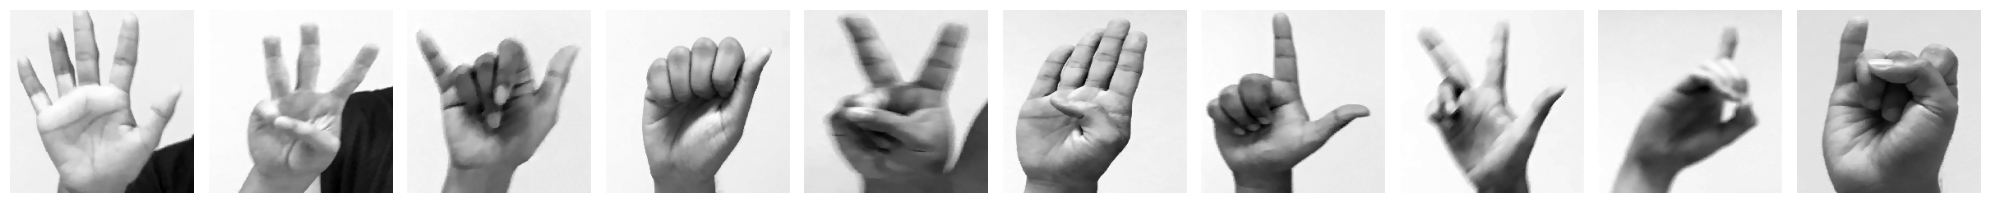

In [45]:
imgs=next(test_generator)
plotImage(imgs)

In [46]:
predictions=network.predict(test_generator,steps=len(test_generator))

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step


In [47]:
predictions=np.argmax(predictions,axis=1)

In [48]:
submit_df=pd.DataFrame(
{
    'id':id_data_test,
    'predict':predictions
})
submit_df.head(20)

,id,predict
0,5f3540c43f86dab2c9a7c87834311ee3.jpg,14
1,7f14db51f1994bce42972c7fe111f5cd.jpg,10
2,092908960a3d4dccbe06a60b71dcdd98.jpg,11
3,542ed4f107f9472457b47a436ec55e60.jpg,15
4,c125af0d467cffe584728aad4b426d53.jpg,1
5,dac637220376b2f834447c515148e301.jpg,16
6,c94daf6d789e53fd933cb26cedf00678.jpg,7
7,559cbbb343a27ec2839477c53b0ba65b.jpg,12
8,4a6bd7247218fe3cd2001a634b1fd6df.jpg,18
9,0598c5bd6d54bb7d9e3b7ece979a118c.jpg,4


In [50]:
submit_df.to_csv('my_submission.csv',index=False)